### Importação das bibliotecas

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.mask import mask

In [15]:
florestal = gpd.read_file('D:/thesis_data/ROI/classes/form_florestal_10m_32723.geojson')
savanica = gpd.read_file('D:/thesis_data/ROI/classes/form_savanica_10m_32723.geojson')
campestre = gpd.read_file('D:/thesis_data/ROI/classes/form_campestre_10m_32723.geojson')
agua = gpd.read_file('D:/thesis_data/ROI/classes/form_florestal_10m_32723.GEOJSON')

In [32]:
geometries = [geom for geom in campestre.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/dprvi_parameters/dprvi_parameters_20170112T084450.tif') as raster:
    out_image, out_trasnform = mask(raster, geometries, crop=True, nodata=np.nan)

    dprvi = out_image[0]
    dop = out_image[1]
    lambda1 = out_image[2]
    lambda2 = out_image[3]
    beta = out_image[4]

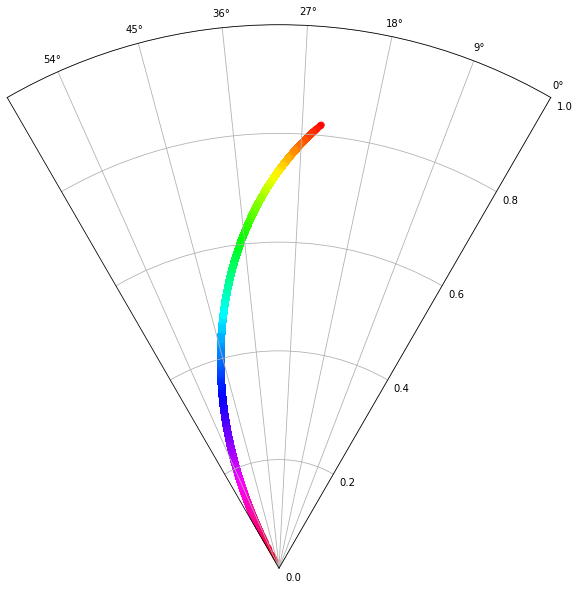

In [33]:
theta = np.arccos(beta)
r = dop

colors = theta

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, polar=True)

ax.scatter(theta, r, c=colors, cmap='hsv', alpha=0.75)

ax.set_thetamin(0)
ax.set_thetamax(60)

ax.set_rmax(1.0)
ax.set_theta_zero_location('NE', offset=15)